In [2]:
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Change the number of units to match the number of classes (10 for MNIST)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Change loss function
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
938/938 [==============================] - 47s 48ms/step - loss: 0.1776 - accuracy: 0.9478 - val_loss: 0.0537 - val_accuracy: 0.9815
Epoch 2/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0558 - accuracy: 0.9827 - val_loss: 0.0599 - val_accuracy: 0.9801
Epoch 3/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0393 - accuracy: 0.9878 - val_loss: 0.0439 - val_accuracy: 0.9856
Epoch 4/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0329 - val_accuracy: 0.9888
Epoch 5/5
938/938 [==============================] - 43s 45ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0312 - val_accuracy: 0.9897


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [9]:
model.save('model.h5')

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


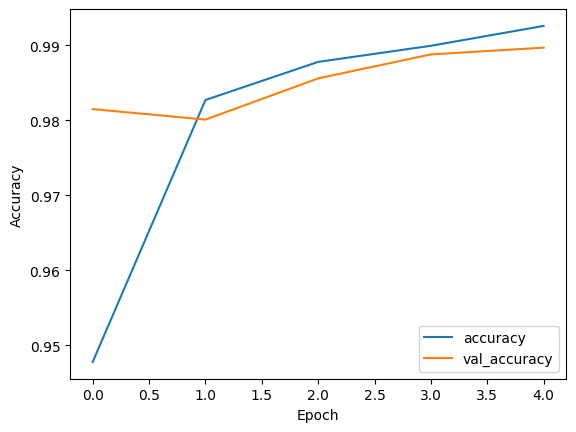

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


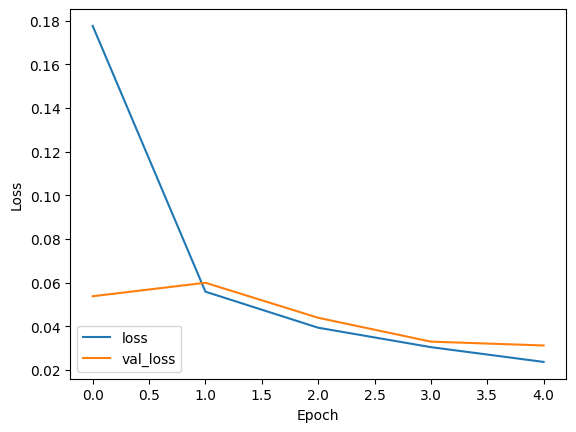

In [6]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.show()

313/313 [==============================] - 3s 9ms/step - loss: 0.0312 - accuracy: 0.9897
Test accuracy: 0.9897000193595886


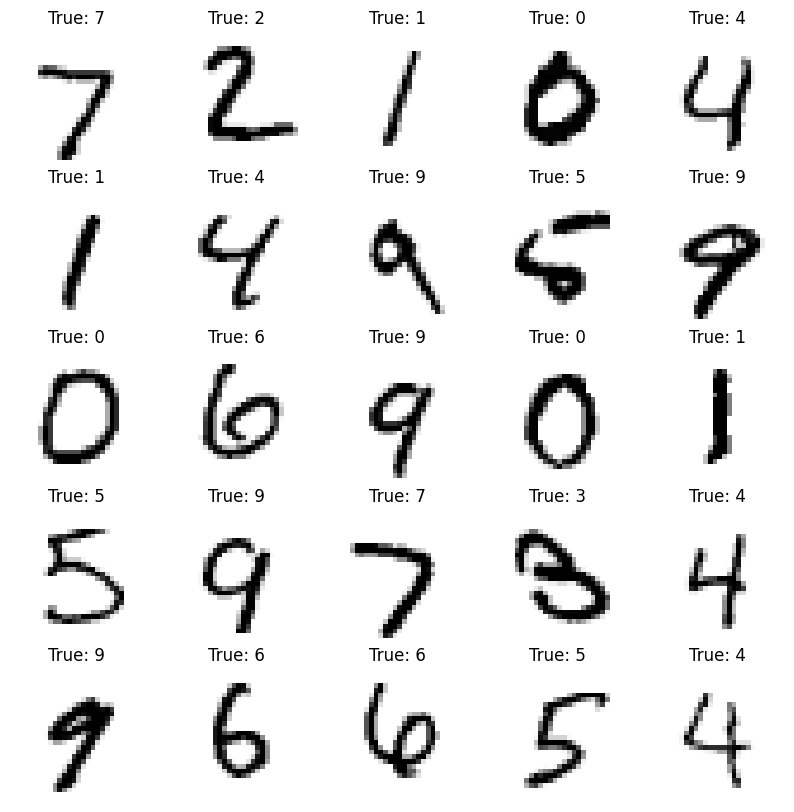

In [7]:
import matplotlib.pyplot as plt

# Evaluate the model on the test images
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Print the test accuracy
print('Test accuracy:', test_acc)

# Print the test images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i].reshape(28,28), cmap='binary')
    ax.set_title(f"True: {test_labels[i]}")
    ax.axis('off')
plt.show()
